In [1]:
import pandas as pd

In [2]:
athletes = pd.read_csv("bgadoci-crossfit-data/athletes.csv")
athletes

c:\users\hambl\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,retrieved_datetime
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,NaN
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423001,574489.0,Odo Renata,Latin America,Team Guarujá Inox,CrossFit Guaruja,Female,36.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-25 09:55:05
423002,585696.0,Lozzie Trevor,Australia,FBP CrossFit Games Team,FBP CrossFit,Female,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-25 09:55:06
423003,608828.0,Marisol Smith,North West,CrossFit Oak Harbor,CrossFit Oak Harbor,Female,44.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-25 09:55:07
423004,628881.0,Pedrini Morgane,Europe,NaN,CrossFit 67,Female,20.0,64.0,61.0,NaN,...,80.0,143.0,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|,NaN,I began CrossFit with a coach (e.g. at an affi...,I usually only do 1 workout a day|I strictly s...,6-12 months|,2015-03-25 09:55:07


## Braden's Preprocessing Section - Join Data and Filter Columns

In [3]:
# First need to read in the leader dataset
leader = pd.read_csv("bgadoci-crossfit-data/leaderboard.15.csv")

In [4]:
# Join on athlete ID
df = pd.merge(athletes, leader, on='athlete_id', how='inner')
# Make sure it looks okay
df.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,schedule,howlong,retrieved_datetime_x,year,division,stage,rank,score,retrieved_datetime_y,scaled
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,5.0,44119.0,771.0,2015-03-31 21:47:26,0
1,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,1.0,43966.0,130.0,2015-03-31 23:02:54,0
2,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,1.1,32461.0,225.0,2015-03-31 23:30:57,0
3,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,2.0,58455.0,78.0,2015-03-31 23:53:31,0
4,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,3.0,30179.0,314.0,2015-04-01 00:27:51,0


In [5]:
# Drop all of our na's and check for unique values in each column
testing = df.dropna()
testing.nunique()

athlete_id               679
name                     679
region                    17
team                     574
affiliate                567
gender                     2
age                       38
height                    23
weight                   120
fran                     313
helen                    335
grace                    270
filthy50                 503
fgonebad                 247
run400                    95
run5k                    381
candj                    120
snatch                   113
deadlift                 141
backsq                   133
pullups                   80
eat                       23
train                     45
background                18
experience                43
schedule                  51
howlong                   12
retrieved_datetime_x     675
year                       1
division                   2
stage                      6
rank                    2427
score                    775
retrieved_datetime_y    2211
scaled        

NOTE: We noticed in our EDA that several variables had absurd responses: 800,000 pullups, 5,000 lb. back squat etc... So we used our best judgement to determine where the cutoff for a reasonable score on each continuous variable might be.

In [6]:
# How many rows we have before
print(len(testing))

3802


In [7]:
# Filtered Dataframes
testing = testing[testing['fran'] < 1250]
testing = testing[testing['helen'] < 2000]
testing = testing[testing['grace'] < 1000]
testing = testing[testing['filthy50'] < 4000]
testing = testing[testing['fgonebad'] < 625]
testing = testing[testing['run400'] < 200]
testing = testing[testing['run5k'] < 3000]
testing = testing[testing['candj'] < 500]
testing = testing[testing['snatch'] < 350]
testing = testing[testing['deadlift'] < 750]
testing = testing[testing['backsq'] < 750]
testing = testing[testing['pullups'] < 74]


In [8]:
# Number of rows now
print(len(testing))

3625


3802
3625

<AxesSubplot:>

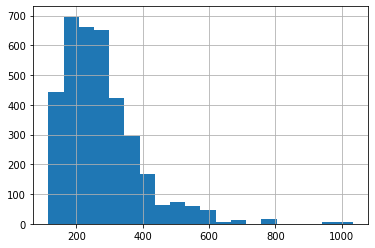

In [9]:
# Histogram to illustrate the distribution looks okay 
testing.fran.hist(bins = 20)



In [ ]:
#athletes.eat.unique()

Possible values for eat:
* I eat quality foods but don't measure the amount
* I eat strict Paleo
* I eat 1-3 full cheat meals per week
* I eat whatever is convenient
* I weigh and measure my food

In [ ]:
#athletes.train.unique()

Possible values for train:
* I workout mostly at a CrossFit Affiliate
* I have a coach who determines my programming
* I record my workouts
* I incorporate CrossFit.com workouts
* I write my own programming
* I workout mostly at home, work, or a traditional gym



In [10]:
import numpy as np
athletes = testing

In [11]:
# calculate dummies for train column
athletes = athletes.dropna()
a = athletes["train"].str.split('|').explode().to_frame()
cols = a["train"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["train"])[cols]], axis=1)

athletes.drop('train', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,score,retrieved_datetime_y,scaled,I workout mostly at a CrossFit Affiliate,"I workout mostly at home, work, or a traditional gym",I have a coach who determines my programming,I incorporate CrossFit.com workouts,I write my own programming,I record my workouts,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,498.0,2015-03-31 21:45:10,0,1,1,1,1,1,1,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,170.0,2015-03-31 22:59:41,0,1,1,1,1,1,1,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,240.0,2015-03-31 23:28:06,0,1,1,1,1,1,1,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,244.0,2015-03-31 23:52:32,0,1,1,1,1,1,1,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,340.0,2015-04-01 00:17:05,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,131.0,2015-03-31 23:23:15,1,1,0,0,0,0,1,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,115.0,2015-03-31 23:48:30,1,1,0,0,0,0,1,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,135.0,2015-04-01 00:11:44,1,1,0,0,0,0,1,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,533.0,2015-04-01 00:40:56,1,1,0,0,0,0,1,0


In [12]:
# calculate dummies for background column
a = athletes["background"].str.split('|').explode().to_frame()
cols = a["background"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["background"])[cols]], axis=1)

athletes.drop('background', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes


,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I incorporate CrossFit.com workouts,I write my own programming,I record my workouts,Decline to answer,I played youth or high school level sports,I regularly play recreational sports,I played college sports,I played professional sports,I have no athletic background besides CrossFit,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,1,0,0,1,0,0,1,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,1,0,0,1,0,0,1,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,1,0,0,1,0,0,1,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,1,0,0,1,0,0,1,0


In [13]:
# calculate dummies for experience column
a = athletes["experience"].str.split('|').explode().to_frame()
cols = a["experience"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["experience"])[cols]], axis=1)

athletes.drop('experience', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I played professional sports,I have no athletic background besides CrossFit,Decline to answer,I began CrossFit by trying it alone (without a coach),I have completed the CrossFit Level 1 certificate course,I train other people,I have attended one or more specialty courses,I have had a life changing experience due to CrossFit,I began CrossFit with a coach (e.g. at an affiliate),Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,1,0,0,0,0,0,0,1,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,1,0,0,0,0,0,0,1,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,1,0,0,0,0,0,0,1,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,1,0,0,0,0,0,0,1,0


In [14]:
# calculate dummies for schedule column
a = athletes["schedule"].str.split('|').explode().to_frame()
cols = a["schedule"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["schedule"])[cols]], axis=1)

athletes.drop('schedule', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I began CrossFit with a coach (e.g. at an affiliate),Decline to answer,I do multiple workouts in a day 3+ times a week,I typically rest fewer than 4 days per month,I typically rest 4 or more days per month,I usually only do 1 workout a day,I do multiple workouts in a day 1x a week,I strictly schedule my rest days,I do multiple workouts in a day 2x a week,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,1,0,0,0,1,1,0,0,0,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,1,0,0,0,1,1,0,0,0,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,1,0,0,0,1,1,0,0,0,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,1,0,0,0,1,1,0,0,0,0


In [15]:
# calculate dummies for schedule column
a = athletes["eat"].str.split('|').explode().to_frame()
cols = a["eat"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["eat"])[cols]], axis=1)

athletes.drop('eat', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I do multiple workouts in a day 1x a week,I strictly schedule my rest days,I do multiple workouts in a day 2x a week,Decline to answer,I eat quality foods but don't measure the amount,I eat 1-3 full cheat meals per week,I eat whatever is convenient,I weigh and measure my food,I eat strict Paleo,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,0,0,0,0,1,0,1,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,0,0,0,0,1,0,1,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,0,0,0,0,1,0,1,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,0,0,0,0,1,0,1,0


In [16]:
athletes.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I do multiple workouts in a day 1x a week,I strictly schedule my rest days,I do multiple workouts in a day 2x a week,Decline to answer,I eat quality foods but don't measure the amount,I eat 1-3 full cheat meals per week,I eat whatever is convenient,I weigh and measure my food,I eat strict Paleo,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#athletes.background.unique()

Possible values for background:
* I played youth or high school level sports
* I regularly play recreational sports
* I played college sports
* I have no athletic background besides CrossFit
* I played professional sports

In [ ]:
#athletes.experience.unique()

Possible values for experience: 
* I began CrossFit with a coach (e.g. at an affiliate)
* I have attended one or more specialty courses
* I have had a life changing experience due to CrossFit
* I began CrossFit by trying it alone (without a coach)
* I have completed the CrossFit Level 1 certificate course
* I train other people


In [ ]:
#athletes.schedule.unique()

Possible values for schedule:
* I do multiple workouts in a day 2x a week
* I usually only do 1 workout a day
* I strictly schedule my rest days
* I typically rest 4 or more days per month
* I do multiple workouts in a day 3+ times a week
* I typically rest fewer than 4 days per month
* I do multiple workouts in a day 1x a week

In [ ]:
#athletes.howlong.unique()

In [ ]:
athletes.age.describe()

In [ ]:
athletes.height.describe()

In [ ]:
athletes.weight.describe()

In [ ]:
 athletes.fran.describe()

In [ ]:
 athletes.helen.describe()

In [ ]:
 athletes.grace.describe()

In [ ]:
 athletes.filthy50.describe()

In [ ]:
 athletes.fgonebad.describe()

In [ ]:
 athletes.run400.describe()

In [ ]:
 athletes.run5k.describe()

In [ ]:
 athletes.candj.describe()

In [ ]:
 athletes.snatch.describe()

In [ ]:
 athletes.deadlift.describe()

In [ ]:
 athletes.backsq.describe()

In [ ]:
 athletes.pullups.describe()

In [ ]:
athletes[athletes.pullups > 1000]

In [16]:
athletes["male"] = pd.get_dummies(athletes.gender)["Male"]

In [17]:
athletes.drop('athlete_id', axis=1)

,name,region,team,affiliate,gender,age,height,weight,fran,helen,...,I strictly schedule my rest days,I do multiple workouts in a day 2x a week,Decline to answer,I eat quality foods but don't measure the amount,I eat 1-3 full cheat meals per week,I eat whatever is convenient,I weigh and measure my food,I eat strict Paleo,Decline to answer,male
82091,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
82092,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
82093,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
82094,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
82095,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,962.0,...,0,0,0,0,0,1,0,1,0,0
1384130,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,962.0,...,0,0,0,0,0,1,0,1,0,0
1384131,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,962.0,...,0,0,0,0,0,1,0,1,0,0
1384132,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,962.0,...,0,0,0,0,0,1,0,1,0,0


In [18]:
X = athletes.drop(['rank', 'athlete_id', 'name', 'region', 'team', 'affiliate', 'howlong', 'retrieved_datetime_x','retrieved_datetime_y', 'gender'], axis=1)
y = athletes["rank"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=801)

Decision tree model

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# split train and test
# done above

In [27]:
def PipeTree(max_depth):
    return make_pipeline(StandardScaler(),
                         DecisionTreeRegressor(max_depth=max_depth, random_state=0))

In [23]:
pipe = PipeTree()
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=6, random_state=0))])

In [27]:
pipe = PipeTree(max_depth=5)
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=6, random_state=0))])

In [28]:
pipe = PipeTree(max_depth=3)
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=6, random_state=0))])

RMSE value for k=  1 is: 20642.77027637022
RMSE value for k=  2 is: 17899.391342208895
RMSE value for k=  3 is: 15327.220282491484
RMSE value for k=  4 is: 14410.57785465823
RMSE value for k=  5 is: 13317.336446306284
RMSE value for k=  6 is: 12627.278421621208
RMSE value for k=  7 is: 12198.475889273239
RMSE value for k=  8 is: 12123.861179072295
RMSE value for k=  9 is: 10863.604849363439
RMSE value for k=  10 is: 11088.072117482843
RMSE value for k=  11 is: 9880.748648981706
RMSE value for k=  12 is: 9653.845858884768
RMSE value for k=  13 is: 9884.796575477058
RMSE value for k=  14 is: 8630.012742988813
RMSE value for k=  15 is: 9298.806326794038
RMSE value for k=  16 is: 8970.067262290691
RMSE value for k=  17 is: 9414.026641307431
RMSE value for k=  18 is: 9478.401299860432
RMSE value for k=  19 is: 9557.294508532494
RMSE value for k=  20 is: 9110.337457243691
RMSE value for k=  21 is: 9307.427386507381
RMSE value for k=  22 is: 9644.540766653252
RMSE value for k=  23 is: 8984.57

<AxesSubplot:>

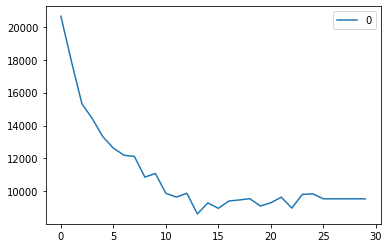

In [29]:
rmse_val = [] #to store rmse values for different k
K=0
for K in range(30):
    K = K+1
    model = PipeTree(max_depth = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = (mean_squared_error(y_test,pred))**(0.5) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()


In [ ]:
pipe.named_steps

In [31]:
# takes a long time to run
param_grid = [{'decisiontreeregressor__max_depth': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
gs.best_params_

{'decisiontreeregressor__max_depth': 16}

In [30]:
pipe = PipeTree(max_depth=16)
pipe.fit(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=6, random_state=0))])

In [31]:
y_hat = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
mse
#yikes

159448160.3371406

In [3]:
import math

In [33]:
rmse = mse **(.5)
rmse

12627.278421621208

In [34]:
X_train.columns

Index(['age', 'height', 'weight', 'fran', 'helen', 'grace', 'filthy50',
       'fgonebad', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq',
       'pullups', 'year', 'division', 'stage', 'score', 'scaled',
       'I workout mostly at a CrossFit Affiliate',
       'I workout mostly at home, work, or a traditional gym',
       'I have a coach who determines my programming',
       'I incorporate CrossFit.com workouts', 'I write my own programming',
       'I record my workouts', 'Decline to answer',
       'I played youth or high school level sports',
       'I regularly play recreational sports', 'I played college sports',
       'I played professional sports',
       'I have no athletic background besides CrossFit', 'Decline to answer',
       'I began CrossFit by trying it alone (without a coach)',
       'I have completed the CrossFit Level 1 certificate course',
       'I train other people', 'I have attended one or more specialty courses',
       'I have had a life chang

bagging

knn